In [1]:
#imports
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler as std
from sklearn.decomposition import PCA
import os
import gc
import sys
import seaborn as sns
import torch 
import torch.nn as nn
import keras
import datetime
from tqdm import tqdm 
import gc 
import pickle as p

In [2]:
file=open("/kaggle/input/iitb-weld-right/9_fold_data.bin","rb")
data=p.load(file)
file.close()
"""
Data as dict

{int>>employcode:[list of dfs with defect 0,list of dfs with defect 1]}

"""


'\nData as dict\n\n{int>>employcode:[list of dfs with defect 0,list of dfs with defect 1]}\n\n'

In [3]:
data[0][0][1].shape
# "data loaded"

(60, 25)

In [4]:
data[0][0][0]

,Production,Order Operation No,Time,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Delta_Time,...,Heat,lag_Power,lag_Delta_Time,lag_Delta_Temperature,lag_Alpha,lag_Heat,lag_Current,lag_Humidity,lag_Flow,lag_Job Temp
54723,17,4,44881837,5.47,79,24,0.00,31.1,0.0,594,...,3.24918,-0.91,94,0.0,0.000000,0.05918,-0.91,0,0.00,0.0
54724,17,4,44882339,5.51,79,24,0.03,31.3,0.0,502,...,2.76602,0.04,-92,0.2,-0.304843,-0.48316,0.04,0,0.03,0.2
54725,17,4,44882854,-0.05,79,24,0.03,31.3,0.0,515,...,-0.02575,-5.56,13,0.0,0.000000,-2.79177,-5.56,0,0.00,0.0
54726,17,4,44883449,2.90,80,24,0.00,31.6,0.0,595,...,1.72550,2.95,80,0.3,-0.295602,1.75125,2.95,1,-0.03,0.3
54727,17,4,44883940,2.29,80,24,0.05,31.6,0.0,491,...,1.12439,-0.61,-104,0.0,0.000000,-0.60111,-0.61,0,0.05,0.0
54728,17,4,44884452,3.15,80,24,0.00,31.2,0.0,512,...,1.61280,0.86,21,-0.4,0.584795,0.48841,0.86,0,-0.05,-0.4
54729,17,4,44884952,1.69,79,24,0.05,31.2,0.0,500,...,0.84500,-1.46,-12,0.0,-0.138889,-0.76780,-1.46,-1,0.05,0.0
54730,17,4,44885558,0.96,79,24,0.00,31.2,0.0,606,...,0.58176,-0.73,106,0.0,0.000000,-0.26324,-0.73,0,-0.05,0.0
54731,17,4,44886055,5.89,79,24,0.00,31.7,0.0,497,...,2.92733,4.93,-109,0.5,-0.712482,2.34557,4.93,0,0.00,0.5
54732,17,4,44886653,6.39,79,24,0.00,31.7,0.0,598,...,3.82122,0.50,101,0.0,0.000000,0.89389,0.50,0,0.00,0.0


In [5]:
from tensorflow.keras import initializers

In [6]:
def the_model():
    x_input =keras.layers.Input(shape=(cfg.num_rows, cfg.num_cols))
    x1 = keras.layers.Bidirectional(keras.layers.LSTM(units=256, return_sequences=True))(x_input)
    x2 = keras.layers.Bidirectional(keras.layers.LSTM(units=128, return_sequences=True))(x1)
    z1 = keras.layers.Bidirectional(keras.layers.GRU(units=64, return_sequences=True))(x1)
    c = keras.layers.Concatenate(axis=2)([x2, z1])
#     x3 = keras.layers.Bidirectional(keras.layers.LSTM(units=256, return_sequences=True))(c)
#     x30=keras.layers.Bidirectional(keras.layers.LSTM(units=256,return_sequences=True))(x1)
#     c1=keras.layers.Concatenate(axis=2)([x3,x30])
    x4 = keras.layers.GlobalMaxPooling1D()(c)#(c1)
    #x41=keras.layers.Dense(units=32,activation="relu")(x4)
    x411=keras.layers.Dense(units=16,activation="relu", kernel_initializer=initializers.RandomNormal(stddev=0.01),
    bias_initializer=initializers.Zeros())(x4)
    x42=keras.layers.Dropout(0.05)(x411)
    x_output = keras.layers.Dense(1, activation='sigmoid')(x42)
    model = keras.models.Model(inputs=x_input, outputs=x_output, name='lstm_model')
    return model

In [7]:
a=data[0]
np.array(a[0]).shape
# type(a),len(a)
#np.array(data[0][0]).shape
a[0][0]

,Production,Order Operation No,Time,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Delta_Time,...,Heat,lag_Power,lag_Delta_Time,lag_Delta_Temperature,lag_Alpha,lag_Heat,lag_Current,lag_Humidity,lag_Flow,lag_Job Temp
54723,17,4,44881837,5.47,79,24,0.00,31.1,0.0,594,...,3.24918,-0.91,94,0.0,0.000000,0.05918,-0.91,0,0.00,0.0
54724,17,4,44882339,5.51,79,24,0.03,31.3,0.0,502,...,2.76602,0.04,-92,0.2,-0.304843,-0.48316,0.04,0,0.03,0.2
54725,17,4,44882854,-0.05,79,24,0.03,31.3,0.0,515,...,-0.02575,-5.56,13,0.0,0.000000,-2.79177,-5.56,0,0.00,0.0
54726,17,4,44883449,2.90,80,24,0.00,31.6,0.0,595,...,1.72550,2.95,80,0.3,-0.295602,1.75125,2.95,1,-0.03,0.3
54727,17,4,44883940,2.29,80,24,0.05,31.6,0.0,491,...,1.12439,-0.61,-104,0.0,0.000000,-0.60111,-0.61,0,0.05,0.0
54728,17,4,44884452,3.15,80,24,0.00,31.2,0.0,512,...,1.61280,0.86,21,-0.4,0.584795,0.48841,0.86,0,-0.05,-0.4
54729,17,4,44884952,1.69,79,24,0.05,31.2,0.0,500,...,0.84500,-1.46,-12,0.0,-0.138889,-0.76780,-1.46,-1,0.05,0.0
54730,17,4,44885558,0.96,79,24,0.00,31.2,0.0,606,...,0.58176,-0.73,106,0.0,0.000000,-0.26324,-0.73,0,-0.05,0.0
54731,17,4,44886055,5.89,79,24,0.00,31.7,0.0,497,...,2.92733,4.93,-109,0.5,-0.712482,2.34557,4.93,0,0.00,0.5
54732,17,4,44886653,6.39,79,24,0.00,31.7,0.0,598,...,3.82122,0.50,101,0.0,0.000000,0.89389,0.50,0,0.00,0.0


In [8]:
class cfg:
    num_rows=len(data[0][0][0])
    num_cols=len(data[0][0][0].columns)
    fold=5
print(cfg.num_rows,cfg.num_cols)

60 25


In [9]:

def shuffle_in_unison(a, b):
    assert len(a) == len(b)
    shuffled_a = np.empty(a.shape, dtype=a.dtype)
    shuffled_b = np.empty(b.shape, dtype=b.dtype) 
    permutation = np.random.permutation(len(a))
    for old_index, new_index in enumerate(permutation):
        shuffled_a[new_index] = a[old_index]
        shuffled_b[new_index] = b[old_index]
    return shuffled_a, shuffled_b
#cols=[i for i in data[0][0][0].columns if i not in ["Defect","label"]]
for i in tqdm(data):
    typee=np.float
#     print(s[0],type(data[i][0][0]))
#     print(data[0][0][0].shape)
    temp0=np.array(data[i][0]).astype(typee)
    temp1=np.array(data[i][1]).astype(typee)
    ln_1=len(data[i][1])
    ln_0=(ln_1)
    ln_0=int(ln_0)
    y=np.array([0]*ln_1+[1]*ln_1)
    x=np.concatenate((temp0[:ln_1],temp1))
    del temp1,temp0,ln_1
    gc.collect()
    data[i]=shuffle_in_unison(x,y)
    

  0%|          | 0/9 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if sys.path[0] == "":
100%|██████████| 9/9 [00:10<00:00,  1.13s/it]


In [10]:
x.shape,y.shape


((3038, 60, 25), (3038,))

In [11]:
type(data[0][0][0][0][0])

numpy.float64

In [12]:
for i in data:
    print(i , len(data[i][0]))
data[i][0].shape

0 160
97346 1722
382617 720
383138 108
387268 48
391342 3702
394269 1626
394365 364
394965 3038


(3038, 60, 25)

In [13]:
x,y=[],[]
for i in data:
    x.extend(data[i][0])
    y.extend(data[i][1])
x,y=shuffle_in_unison(np.array(x),np.array(y))    

In [14]:
len(x),len(y)

(11488, 11488)

In [15]:
import sklearn
from sklearn.metrics import f1_score
from sklearn.model_selection import GroupKFold,train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
model=the_model()
model.summary()
# sum(np.isnan(y_valid))

2022-12-04 07:19:16.767029: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "lstm_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 60, 25)]     0                                            
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 60, 512)      577536      input_1[0][0]                    
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 60, 256)      656384      bidirectional[0][0]              
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 60, 128)      221952      bidirectional[0][0]              
_________________________________________________________________________________________

In [17]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [18]:
# data.keys()


In [19]:
import tensorflow as tf

In [20]:
lenn=len(x)
n=int(lenn*0.60//1)
X_train=np.array(x[:n])
X_valid=np.array(x[n:])
y_valid=np.array(y[n:])
y_train=np.array(y[:n])
print(X_train.shape,X_valid.shape)
lr = keras.callbacks.ReduceLROnPlateau(monitor="val_f1_m", factor=0.05,patience=5, verbose=True)
es = keras.callbacks.EarlyStopping(monitor="val_f1_m", patience=8,verbose=True, mode="max",restore_best_weights=True) 
sgd = tf.keras.optimizers.Adam(learning_rate=0.0001)
model = the_model()
model.compile(optimizer=sgd, loss="binary_crossentropy", metrics=[f1_m,precision_m, recall_m])
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, batch_size=16,verbose=True, 
        callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),lr,es])

(6892, 60, 25) (4596, 60, 25)


2022-12-04 07:19:20.115210: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
431/431 [==============================] - 318s 713ms/step - loss: 0.6932 - f1_m: 0.1515 - precision_m: 0.1133 - recall_m: 0.2390 - val_loss: 0.6931 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/10
431/431 [==============================] - 192s 445ms/step - loss: 0.6932 - f1_m: 0.4922 - precision_m: 0.3735 - recall_m: 0.7541 - val_loss: 0.6931 - val_f1_m: 0.6555 - val_precision_m: 0.4985 - val_recall_m: 1.0000
Epoch 3/10
431/431 [==============================] - 183s 424ms/step - loss: 0.6932 - f1_m: 0.1979 - precision_m: 0.1476 - recall_m: 0.3109 - val_loss: 0.6931 - val_f1_m: 0.6555 - val_precision_m: 0.4985 - val_recall_m: 1.0000
Epoch 4/10
431/431 [==============================] - 206s 479ms/step - loss: 0.6932 - f1_m: 0.4643 - precision_m: 0.3501 - recall_m: 0.7146 - val_loss: 0.6931 - val_f1_m: 0.6555 - val_precision_m: 0.4985 - val_recall_m: 1.0000
Epoch 5/10
431/431 [==============================] - 221s 514ms/step - loss

In [21]:
model.save("/kaggle/working/")

2022-12-04 07:53:47.586484: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [22]:
X_train.shape,y_train.shape

((6892, 60, 25), (6892,))

In [23]:
a=model.predict(X_train)

<AxesSubplot:ylabel='Count'>

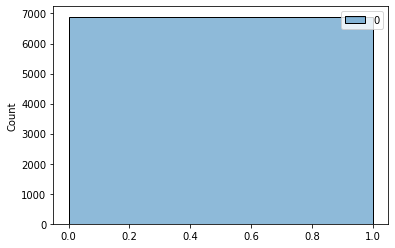

In [24]:
sns.histplot(a)

In [25]:
typee=np.float16
keys=list(data.keys())
cv_score = 0
test_preds = []
for key in range(len(keys)):
    lenn=len(data[keys[key]][0])
    n=int(lenn*0.80//1)
    key=keys[key]
    X_train=data[key][0][:n]
    X_valid=data[key][0][n:]
    y_valid=data[key][1][n:]
    y_train=data[key][1][:n]
    print(X_train.shape,X_valid.shape)
    lr = keras.callbacks.ReduceLROnPlateau(monitor="val_f1_m", factor=0.5,patience=5, verbose=True)
    es = keras.callbacks.EarlyStopping(monitor="val_f1_m", patience=8,verbose=True, mode="max",restore_best_weights=True) 
    model = the_model()
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=[f1_m,precision_m, recall_m])
    model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=20, batch_size=16,verbose=True, 
          callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),lr,es])
    model.save("/kaggle/working/")

(128, 60, 25) (32, 60, 25)
Epoch 1/20
8/8 [==============================] - 15s 670ms/step - loss: 0.7095 - f1_m: 0.5736 - precision_m: 0.4375 - recall_m: 0.8750 - val_loss: 0.6931 - val_f1_m: 0.6643 - val_precision_m: 0.5000 - val_recall_m: 1.0000
Epoch 2/20
8/8 [==============================] - 3s 345ms/step - loss: 0.6931 - f1_m: 0.6618 - precision_m: 0.5000 - recall_m: 1.0000 - val_loss: 0.6931 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/20
8/8 [==============================] - 3s 349ms/step - loss: 0.6932 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 0.6931 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 4/20
8/8 [==============================] - 3s 361ms/step - loss: 0.6932 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 0.6931 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 5/20
8/8 [========

In [26]:
# lr = keras.callbacks.ReduceLROnPlateau(monitor="val_score", factor=0.5,patience=5, verbose=True)
# es = keras.callbacks.EarlyStopping(monitor="val_score", patience=8,verbose=True, mode="max",restore_best_weights=True) 
# model = the_model()
# model.compile(optimizer="adam", loss="binary_crossentropy", metrics=[f1_m,precision_m, recall_m])


In [27]:
# model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=1, batch_size=256,verbose=True,) 
#           #callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),lr,es])

In [28]:
# y_train

In [29]:
# model.predict(X_train)

In [30]:
# X_train

In [31]:
# type(a)

In [32]:
# a=X_train.astype(np.float)